# Business Understanding

    Objective: Introduce the stakeholder and business problem you've identified.
    Description: Explain the relevance of the dataset to the stakeholder's needs and the business problem you aim to solve.

# Data Understanding

    Objective: Provide an overview of the dataset.
    Description: Discuss the dataset's structure, variables, and their potential significance to the business problem. Mention any initial observations or challenges noticed in the data.

In [19]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set the path to your data folder
data_folder_path = 'data'

# List the contents of the data folder
folder_contents = os.listdir(data_folder_path)

# Display the contents of the data folder
print("Contents of the 'data' folder:")
for item in folder_contents:
    print(item)

Contents of the 'data' folder:
column_names.md
kc_house_data.csv


In [4]:
# Set the path to your 'column_names.md' file
column_names_path = 'data/column_names.md'

# Read and display the contents of 'column_names.md'
with open(column_names_path, 'r') as file:
    column_names_content = file.read()

print("Contents of 'column_names.md':\n")
print(column_names_content)

Contents of 'column_names.md':

# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the

In [6]:
# Set the path to your 'kc_house_data.csv' file
kc_house_data_path = 'data/kc_house_data.csv'

# Read 'kc_house_data.csv' using pandas
kc_house_data = pd.read_csv(kc_house_data_path)

# Display the first few rows of 'kc_house_data.csv' to see its structure
print("Preview of 'kc_house_data.csv':\n")
print(kc_house_data.head())

Preview of 'kc_house_data.csv':

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0         

### Dataset Overview:

####    Structure:
        The dataset contains 25 columns/features and multiple rows representing individual house sales in King County.
        Columns include various attributes like house characteristics, location details, sale price, and renovation information.

####   Variables and Potential Significance:
        price: The target variable indicating the sale price of houses. This variable aligns directly with the business problem of advising homeowners on increasing property value.

####    Key Features:
        bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, greenbelt, view, condition, grade, yr_built, yr_renovated: These features likely have substantial influence on house prices. For instance, the number of bedrooms, square footage, condition, and grade often impact property values significantly.

####    Other Features:
        heat_source, sewer_system, sqft_above, sqft_basement, sqft_garage, sqft_patio, address, lat, long: These features might provide additional insights or require further exploration to determine their impact on property prices.

####    Challenges:
        Missing or incorrectly-entered data from the King County Assessor might have affected address, lat, and long fields, indicating the need for outlier detection and handling before including these values in modeling.

#### Initial Observations:

    The dataset seems rich in attributes that could potentially contribute to predicting house prices.
    Features like bedrooms, bathrooms, sqft_living, and location-related features (lat, long) might play crucial roles in determining property values.
    Some categorical variables (waterfront, greenbelt, view, etc.) would likely require encoding for modeling purposes.

The dataset encompasses various house-related features along with location details and sales information. Initial observations indicate a rich pool of variables that might contribute significantly to predicting house prices, aligning well with the objective of advising homeowners on maximizing property value through renovations or improvements.

This dataset's analysis and modeling could focus on identifying the most influential features impacting house prices and providing actionable insights to the real estate agency for guiding homeowners in making informed decisions about renovations.

# Data Preparation

    Objective: Preprocess the dataset for modeling.
    Description: Detail the steps taken for handling missing values, converting non-numeric data, and any feature engineering applied. Explain the rationale behind your preprocessing decisions.

In [7]:
# Load the dataset into a DataFrame (replace 'data/kc_house_data.csv' with your file path)
file_path = 'data/kc_house_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get information about column data types and missing values
print("\nInformation about the dataset:")
print(data.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())


First few rows of the dataset:
           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           

In [9]:
# Handling missing values in 'heat_source' and 'sewer_system' columns
data['heat_source'].fillna('Unknown', inplace=True)
data['sewer_system'].fillna('Unknown', inplace=True)

In [10]:
# Creating a new feature (e.g., total square footage)
data['total_sqft'] = data['sqft_above'] + data['sqft_basement'] + data['sqft_garage'] + data['sqft_patio']
# We may create more features based how we develope our domain knowledge or hypotheses

In [11]:
# List of categorical columns to encode
categorical_cols = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade']

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [14]:
# Example: Identifying and handling outliers using z-score
z_scores = stats.zscore(data['price'])
threshold = 3
outliers = data[(z_scores > threshold) | (z_scores < -threshold)]
# Handle outliers as needed, e.g., remove or cap their values

In [15]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
total_sqft       0
dtype: int64


In [16]:
# if a column has more than 50% missing values, you will choose to drop it
threshold = 0.5  # Using a textbook threshold, which we could modify as needed
cols_to_drop = missing_values[missing_values > len(data) * threshold].index
data.drop(columns=cols_to_drop, inplace=True)
print("Columns dropped:", cols_to_drop)

Columns dropped: Index([], dtype='object')


In [17]:
# For categorical columns, lets impute missing values with the most frequent value
# Example using mode value
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [18]:
# Check if there are any missing values remaining
remaining_missing = data.isnull().sum().sum()
if remaining_missing == 0:
    print("All missing values handled.")
else:
    print(f"There are still {remaining_missing} missing values.")

All missing values handled.


# Exploratory Data Analysis

    Objective: Analyze and visualize the dataset to gain insights.
    Description: Conduct statistical analysis, create visualizations (e.g., histograms, scatter plots, correlation matrices), and explore relationships between variables. Highlight key findings relevant to the business problem.

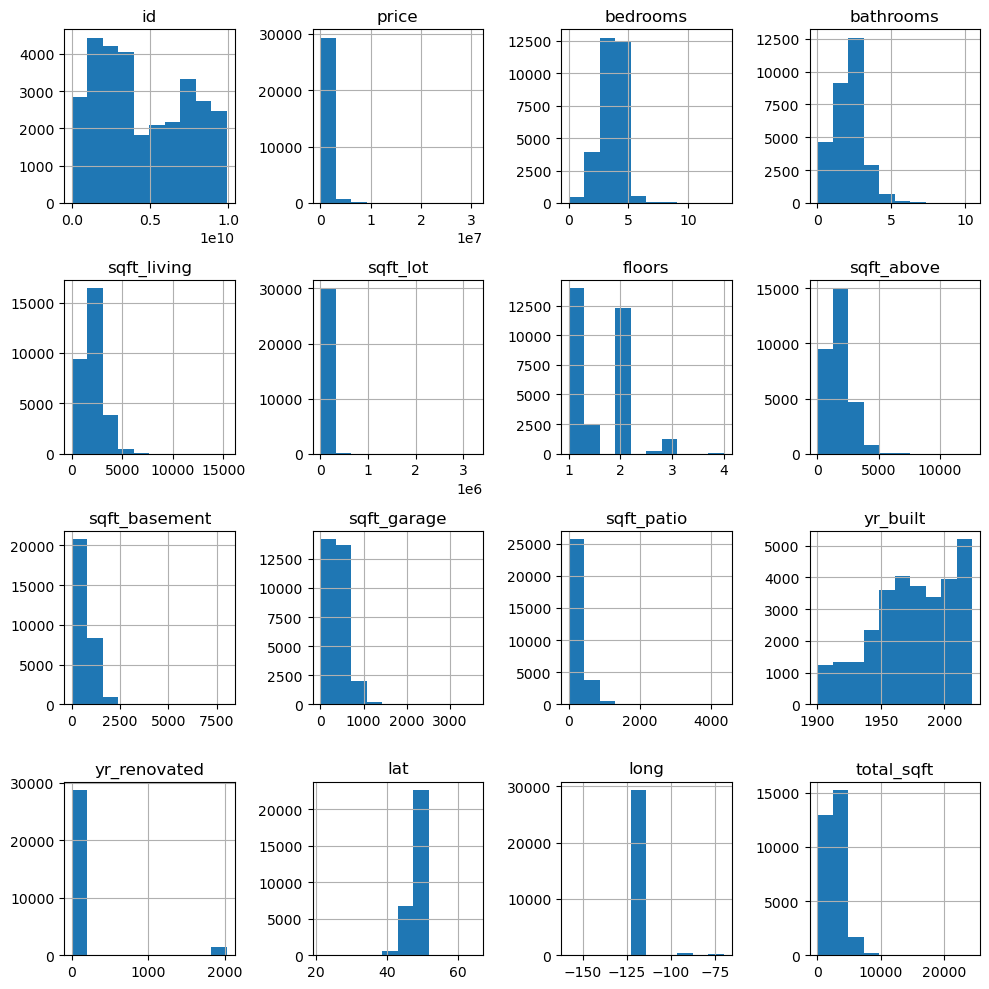

In [26]:
# Taking a look at the data to see what's going on

# Histograms for numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

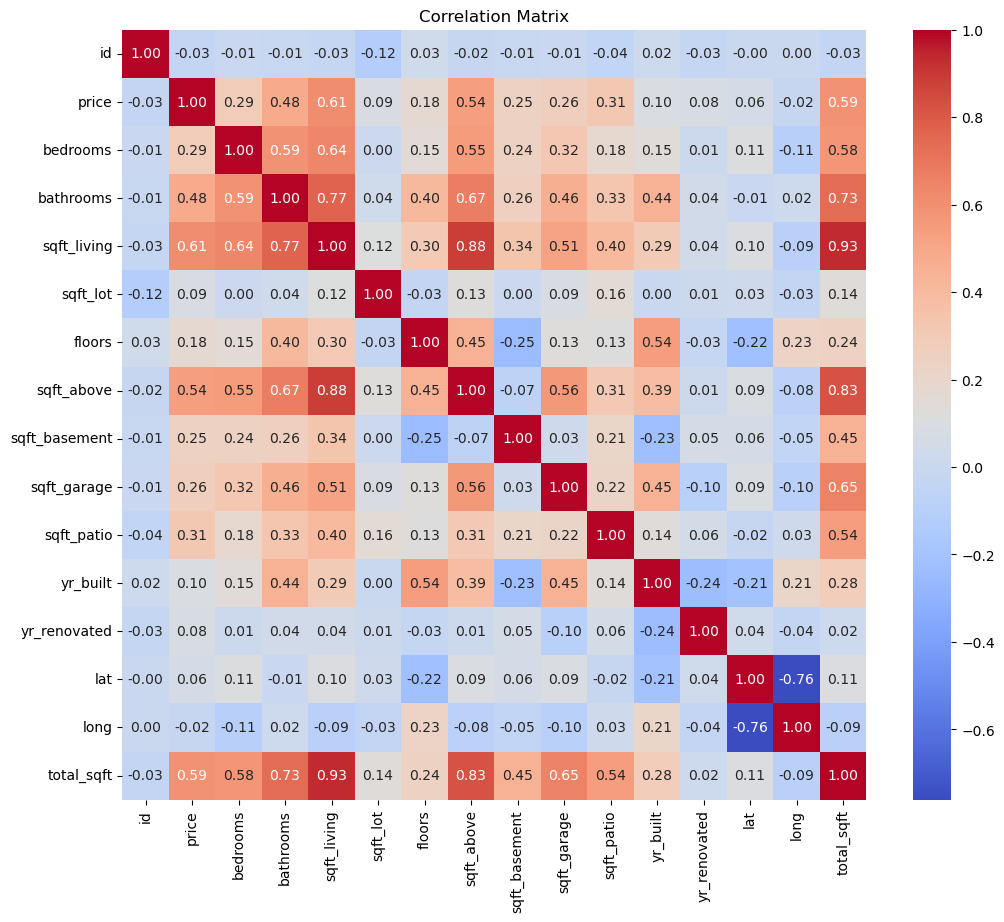

In [27]:
#Correlation matrix
# Get columns with numeric data types
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
# Calculate correlation matrix for numeric columns only
correlation_matrix = data[numeric_cols].corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

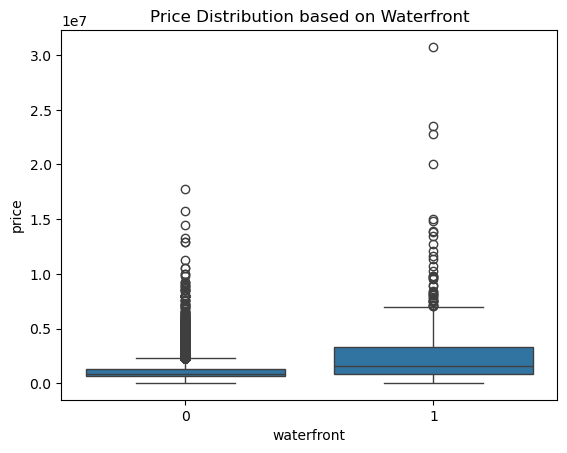

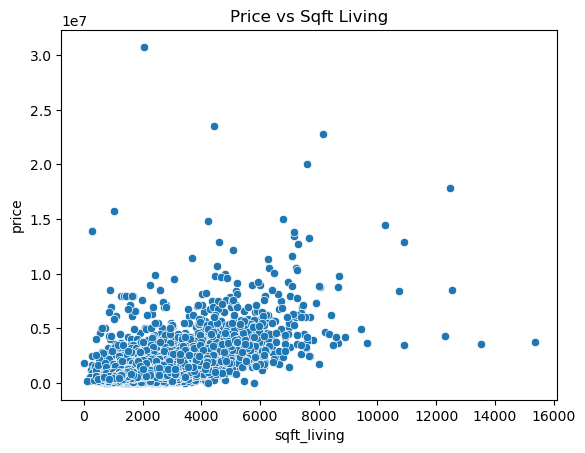

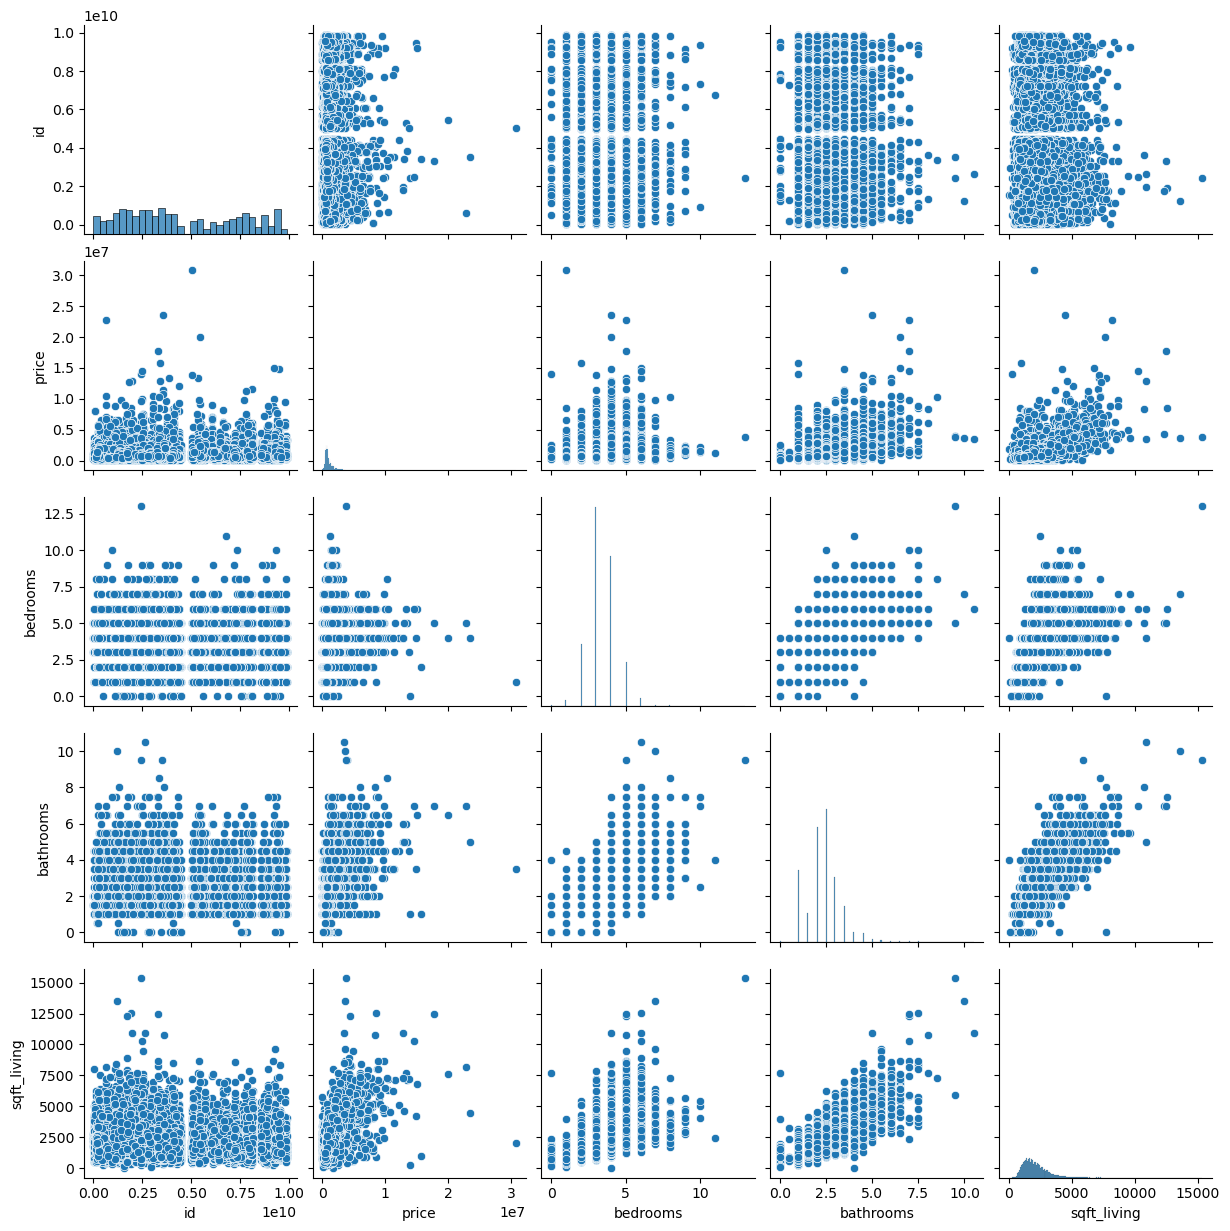

In [28]:
# Boxplot
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('Price Distribution based on Waterfront')
plt.show()

# Scatter plot
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs Sqft Living')
plt.show()

# Pairplot (for small subsets of columns due to computational complexity)
sns.pairplot(data[numerical_cols[:5]])
plt.show()

# Conclusions

    Objective: Summarize the key outcomes from your analysis.
    Description: Provide a summary of the main insights and observations obtained through modeling and exploratory analysis. Link these findings back to the initial business problem.

## Limitations

    Objective: Identify limitations in your analysis.
    Description: Discuss any constraints, biases, or shortcomings in the data, modeling techniques, or analysis approach. Highlight potential areas where the model might not perform optimally.

## Recommendations

    Objective: Offer actionable suggestions based on your findings.
    Description: Provide concrete recommendations to address the business problem. Explain how stakeholders can utilize the insights derived from your analysis.

## Next Steps

    Objective: Outline possible future actions or areas for improvement.
    Description: Suggest potential avenues for further analysis or model refinement. Discuss any additional data sources, techniques, or methodologies that could enhance the current analysis.